In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_halopull
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg
import os

In [94]:
trees = np.sort(os.listdir("../local_trees/"))

In [95]:
MAH_mat = np.empty(shape=(len(trees), cfg.zsample.shape[0]))

for i,file in enumerate(trees):
    MAH_mat[i] = jsm_halopull.hostmass("../local_trees/"+file, return_MAH=True)

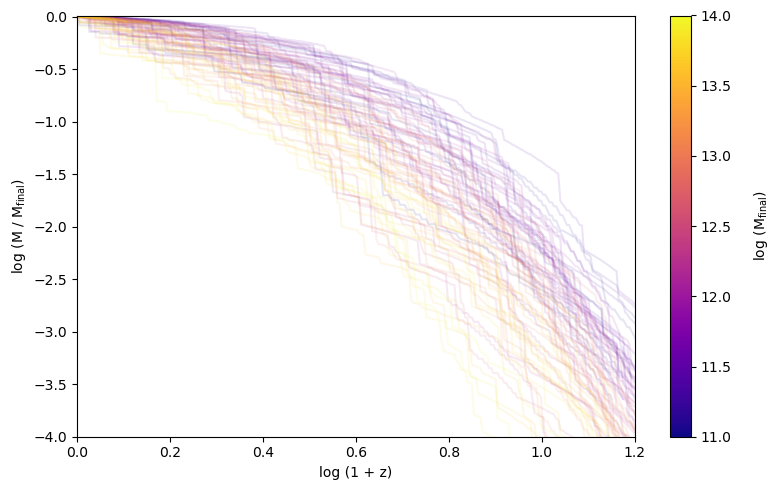

In [96]:
normalized = MAH_mat / MAH_mat[:, 0][:, None]
masses = np.log10(MAH_mat[:, 0])

# Set up colormap
cmap = cm.plasma
norm = colors.Normalize(vmin=masses.min(), vmax=masses.max())

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot each MAH with color according to its final mass
for mah, m in zip(normalized, masses):
    ax.plot(np.log10(1 + cfg.zsample), np.log10(mah),
            color=cmap(norm(m)), alpha=0.1)

# Add colorbar tied to this specific axis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # needed for the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('log (M$_{\mathrm{final}})$', rotation=90, labelpad=15)

ax.set_xlabel('log (1 + z)')
ax.set_ylabel('log (M / M$_{\mathrm{final}})$')
ax.set_ylim(-4, 0.01)
ax.set_xlim(0, 1.2)
fig.tight_layout()

plt.show()



In [97]:
chunks = np.split(normalized, 16)

ave_mat = np.empty(shape=(len(chunks), cfg.zsample.shape[0]))

for i,mat in enumerate(chunks):
    ave_mat[i] = np.average(mat, axis=0)

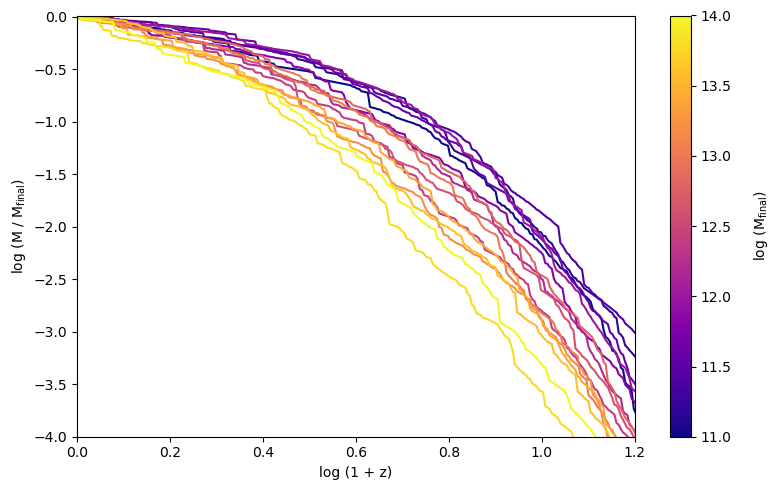

In [98]:
# Set up colormap
cmap = cm.plasma
norm = colors.Normalize(vmin=masses.min(), vmax=masses.max())

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot each MAH with color according to its final mass
for mah, m in zip(ave_mat, np.unique(masses)):
    ax.plot(np.log10(1 + cfg.zsample), np.log10(mah),
            color=cmap(norm(m)))

# Add colorbar tied to this specific axis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # needed for the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('log (M$_{\mathrm{final}})$', rotation=90, labelpad=15)

ax.set_xlabel('log (1 + z)')
ax.set_ylabel('log (M / M$_{\mathrm{final}})$')
ax.set_ylim(-4, 0.01)
ax.set_xlim(0, 1.2)
fig.tight_layout()

plt.show()



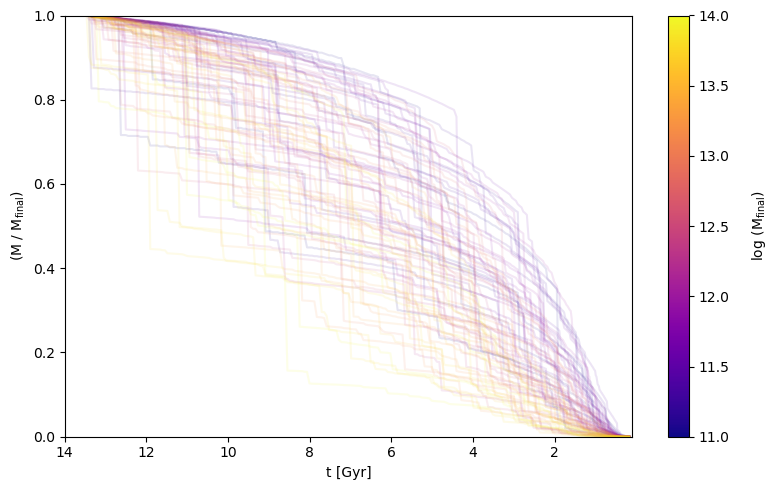

In [103]:
normalized = MAH_mat / MAH_mat[:, 0][:, None]
masses = np.log10(MAH_mat[:, 0])

# Set up colormap
cmap = cm.plasma
norm = colors.Normalize(vmin=masses.min(), vmax=masses.max())

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot each MAH with color according to its final mass
for mah, m in zip(normalized, masses):
    ax.plot(cfg.tsample, mah,
            color=cmap(norm(m)), alpha=0.1)

# Add colorbar tied to this specific axis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # needed for the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('log (M$_{\mathrm{final}})$', rotation=90, labelpad=15)

ax.set_xlabel('t [Gyr]')
ax.set_ylabel('(M / M$_{\mathrm{final}})$')
ax.set_xlim(14, 0.1)
ax.set_ylim(0, 1)
fig.tight_layout()

plt.show()



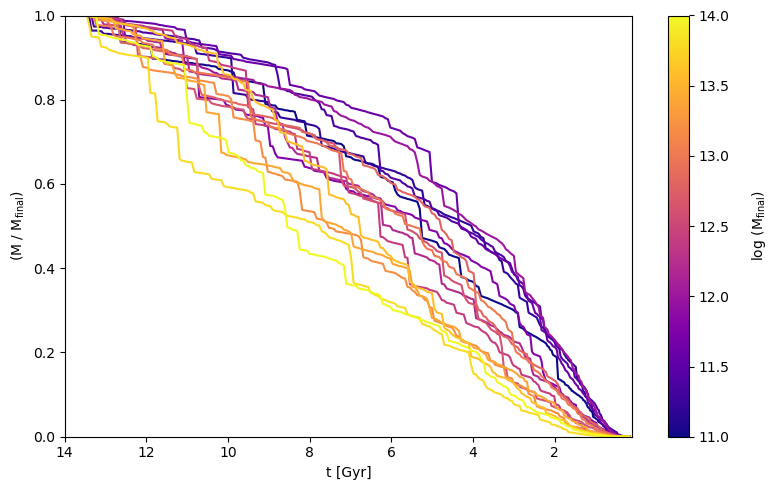

In [105]:
normalized = MAH_mat / MAH_mat[:, 0][:, None]
masses = np.log10(MAH_mat[:, 0])

# Set up colormap
cmap = cm.plasma
norm = colors.Normalize(vmin=masses.min(), vmax=masses.max())

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot each MAH with color according to its final mass
for mah, m in zip(ave_mat, np.unique(masses)):
    ax.plot(cfg.tsample, mah,
            color=cmap(norm(m)))

# Add colorbar tied to this specific axis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # needed for the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('log (M$_{\mathrm{final}})$', rotation=90, labelpad=15)

ax.set_xlabel('t [Gyr]')
ax.set_ylabel('(M / M$_{\mathrm{final}})$')
ax.set_xlim(14, 0.1)
ax.set_ylim(0, 1)
fig.tight_layout()

plt.show()

